In [57]:
train_dataset = read.csv("data/train.csv")

In [58]:
# We reduce the dataframe size to be more workab

N = 100000  
train_dataset = train_dataset[sample(nrow(train_dataset), N), ]

In [59]:
library(ggplot2)

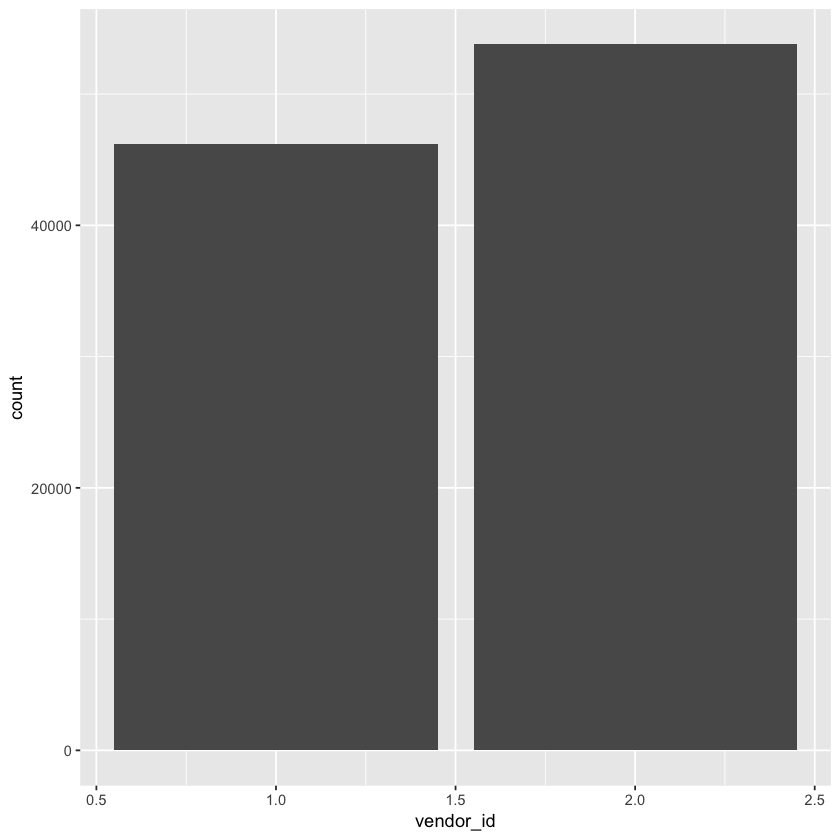

In [60]:
ggplot(train_dataset, aes(x=vendor_id)) + geom_bar()

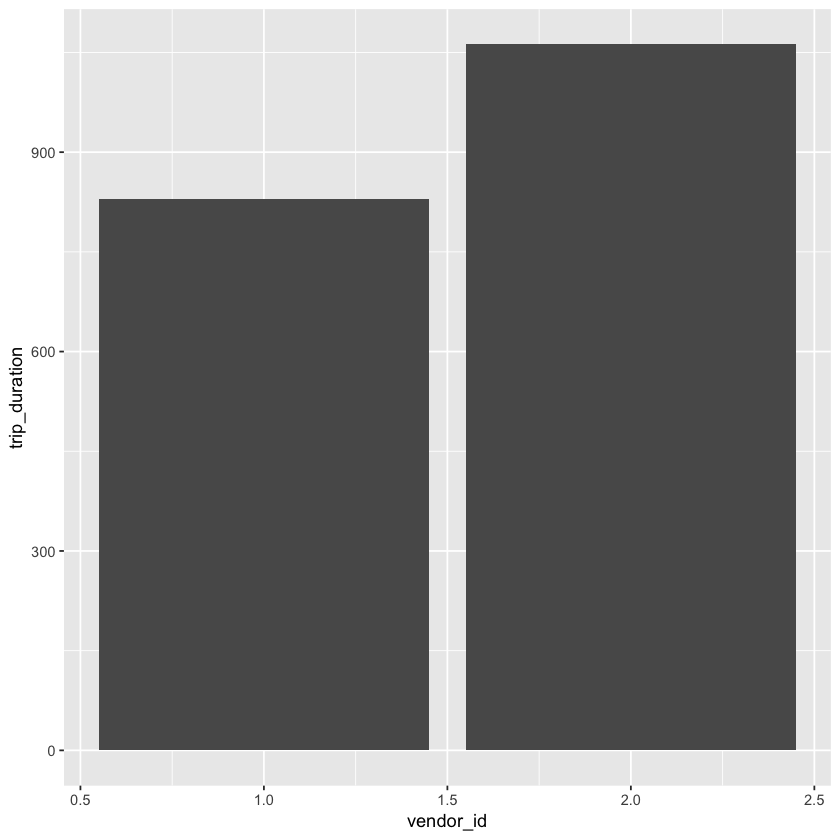

In [61]:
average_trip_duration = aggregate(. ~vendor_id, train_dataset, mean)

ggplot(average_trip_duration, aes(x=vendor_id, y=trip_duration)) + geom_bar(stat = "identity")

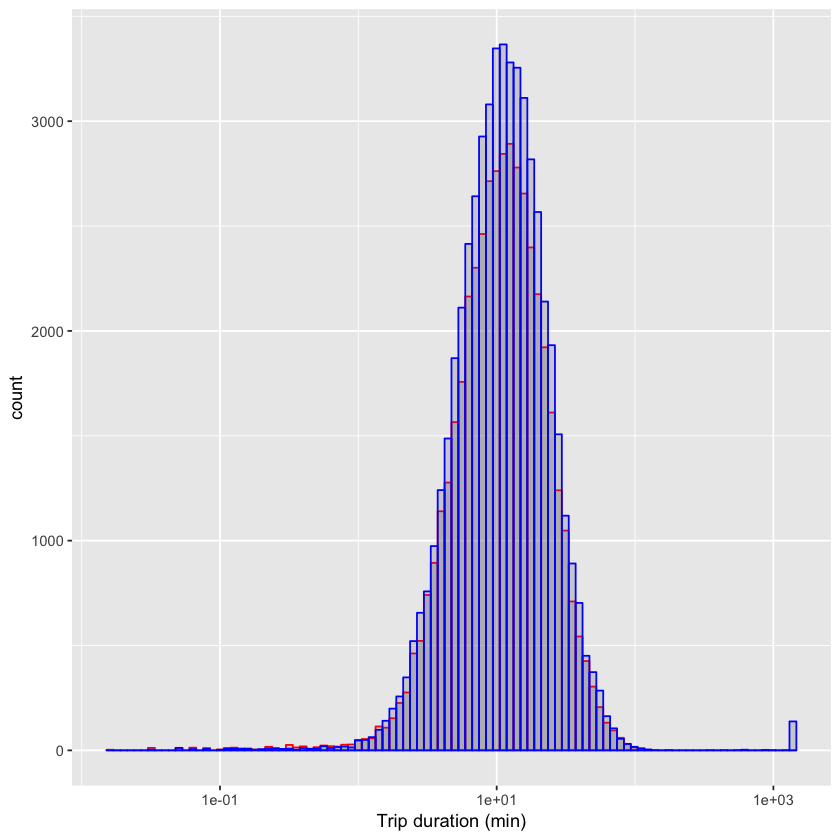

In [62]:
ggplot() + 
    geom_histogram(
        data = subset(train_dataset, train_dataset$vendor_id==1),
        aes(x=trip_duration/60),
        bins=100, 
        colour = 'red',
        alpha = .2) +
    geom_histogram(
        data = subset(train_dataset, train_dataset$vendor_id==2),
        aes(x=trip_duration/60),
        bins=100,
        colour = 'blue',
        alpha = .2) +
    scale_x_log10() +
    xlab("Trip duration (min)")

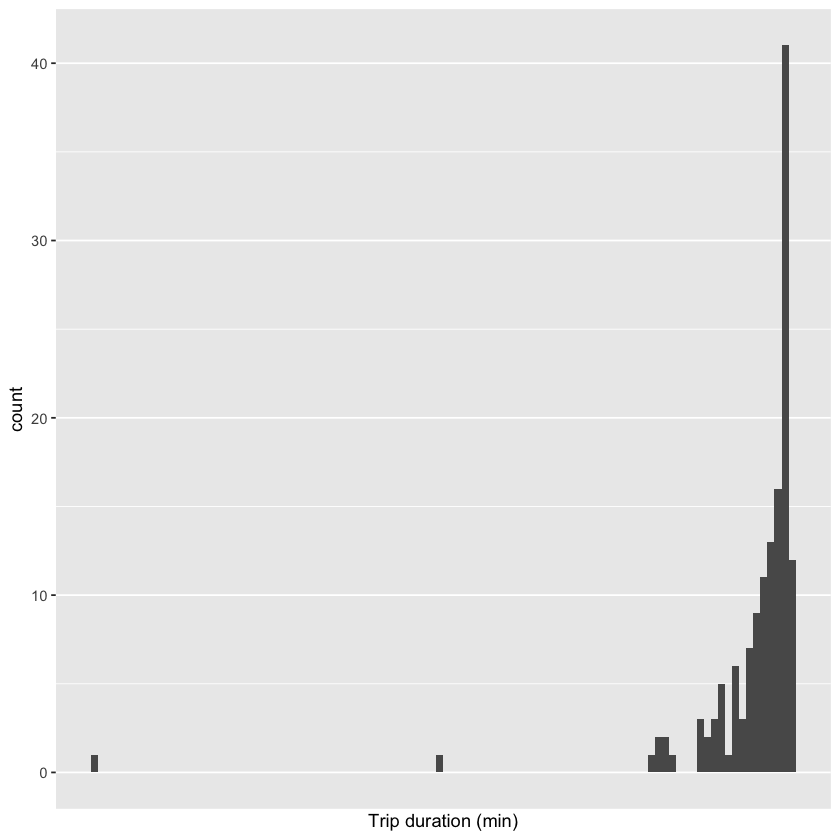

In [63]:
# Very long trips
long_trips = subset(train_dataset, train_dataset$trip_duration > 1000 * 60)

ggplot(long_trips, aes(x=trip_duration/60)) + 
    geom_histogram(bins=100) +
    scale_x_log10() +
    xlab("Trip duration (min)")

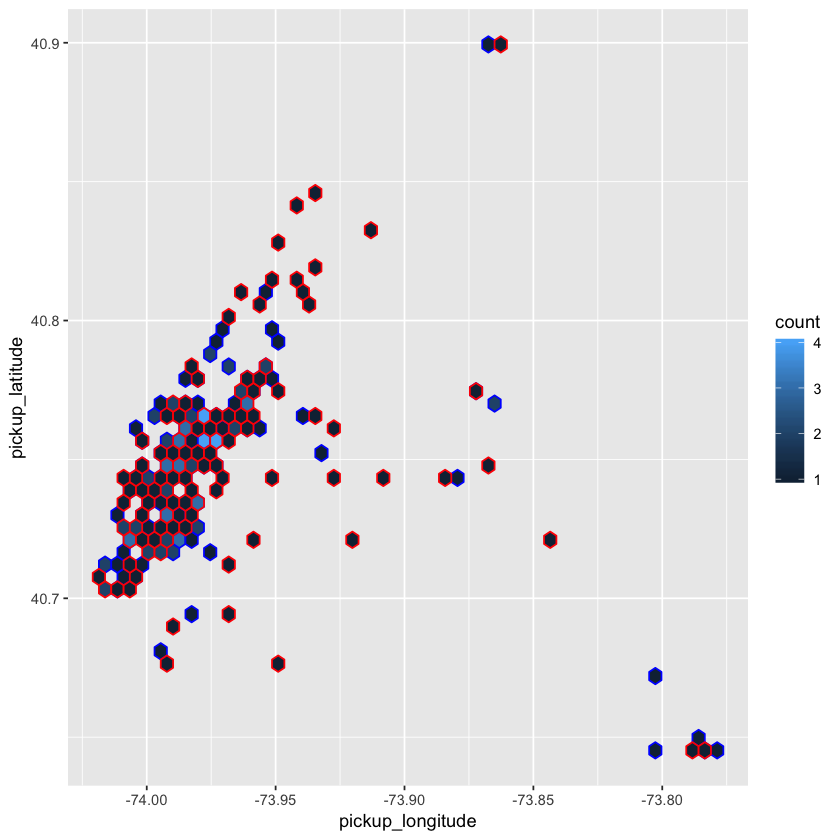

In [64]:
ggplot(long_trips, aes(x=pickup_longitude, y=pickup_latitude)) +
    geom_hex(bins=50, color='blue') +
    stat_bin_hex(data=long_trips, aes(x=dropoff_longitude, y=dropoff_latitude), bins=50, color="red")

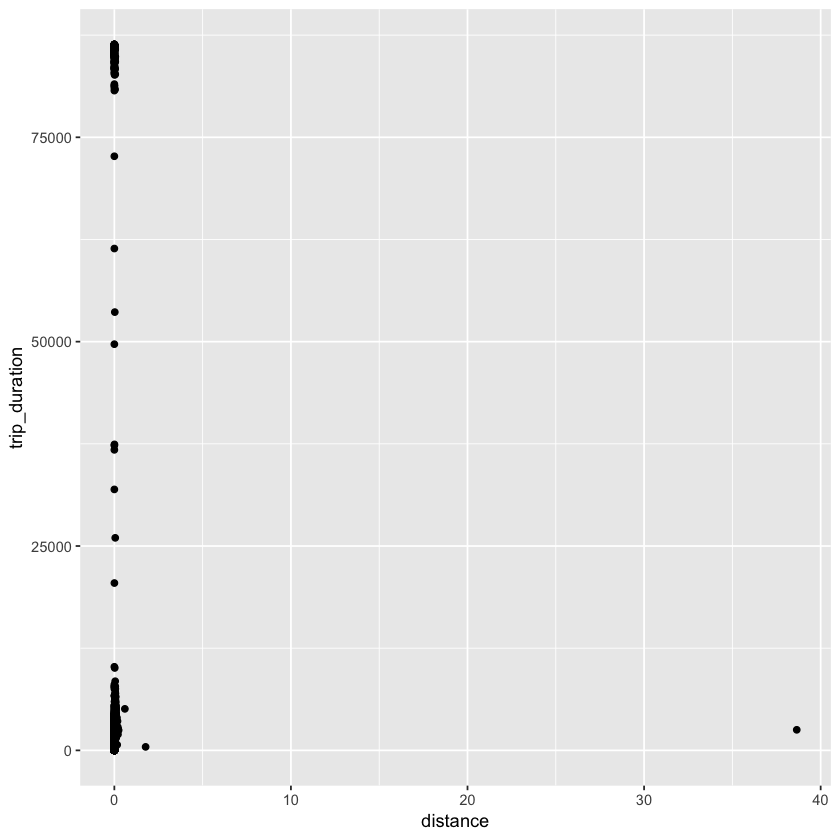

In [65]:
train_dataset$distance = ((train_dataset$dropoff_latitude - train_dataset$pickup_latitude)**2 +
                       (train_dataset$dropoff_longitude - train_dataset$pickup_longitude)**2)
ggplot(train_dataset, aes(x=distance, y=trip_duration)) + geom_jitter()

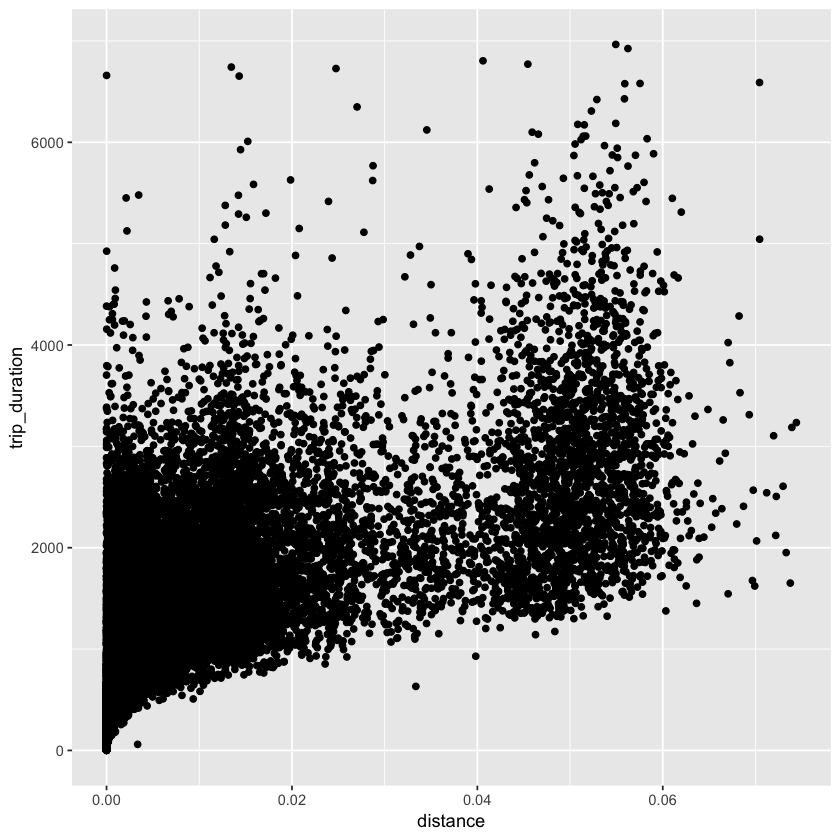

In [66]:
short_trips = subset(train_dataset,
                       train_dataset$trip_duration < 7000 & 
                       train_dataset$distance < .075
                      )
ggplot(short_trips, aes(x=distance, y=trip_duration)) + geom_jitter()

In [68]:
train_dataset$pickup_date = as.Date(train_dataset$pickup_datetime)
train_dataset$dropoff_date = as.Date(train_dataset$dropoff_date)

train_dataset$pickup_day = weekdays(train_dataset$pickup_date)
train_dataset$dropoff_date = weekdays(train_dataset$dropoff_date)

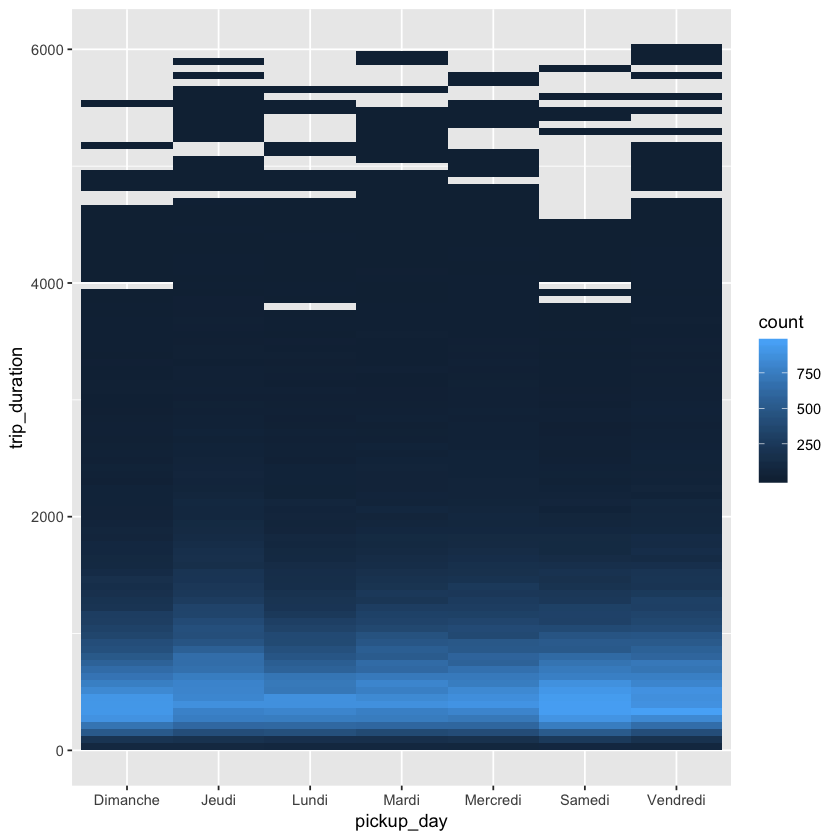

In [75]:
short_trips = subset(train_dataset,
                       train_dataset$trip_duration < 6000 & 
                       train_dataset$distance < .075
                      )
ggplot(short_trips, aes(x=pickup_day, y=trip_duration)) + geom_bin2d(bins=100)

In [77]:
days = c("Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche")
days_plot = c(0, 1, 2, 3, 4, 5, 6)
i = 0
for (day in days) {
    short_trips = subset(train_dataset,
                           train_dataset$trip_duration < 7000 & 
                           train_dataset$distance < .075 &
                           train_dataset$pickup_day == day
                          )
    days_plot[i] = ggplot(short_trips, aes(x=distance, y=trip_duration)) + geom_jitter()
    i = i + 1
    }

Warning message in days_plot[i] <- ggplot(short_trips, aes(x = distance, y = trip_duration)) + :
“le nombre d'objets à remplacer n'est pas multiple de la taille du remplacement”Warning message in days_plot[i] <- ggplot(short_trips, aes(x = distance, y = trip_duration)) + :
“le nombre d'objets à remplacer n'est pas multiple de la taille du remplacement”Warning message in days_plot[i] <- ggplot(short_trips, aes(x = distance, y = trip_duration)) + :
“le nombre d'objets à remplacer n'est pas multiple de la taille du remplacement”Warning message in days_plot[i] <- ggplot(short_trips, aes(x = distance, y = trip_duration)) + :
“le nombre d'objets à remplacer n'est pas multiple de la taille du remplacement”Warning message in days_plot[i] <- ggplot(short_trips, aes(x = distance, y = trip_duration)) + :
“le nombre d'objets à remplacer n'est pas multiple de la taille du remplacement”Warning message in days_plot[i] <- ggplot(short_trips, aes(x = distance, y = trip_duration)) + :
“le nombre d'objet

ERROR: Error in multiplot(days_plot, cols = 2): impossible de trouver la fonction "multiplot"
